In [1]:
import pandas as pd
import re
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [2]:
df = pd.read_csv('train.csv')
X = df.drop('Survived', axis=1) 
y = df.Survived

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.1, random_state=1234) 

In [4]:
class PrepProcesor(BaseEstimator, TransformerMixin): 
    def fit(self, X, y=None): 
        self.ageImputer = SimpleImputer()
        self.ageImputer.fit(X[['Age']])        
        return self 
        
    def transform(self, X, y=None):
        X['Age'] = self.ageImputer.transform(X[['Age']])
        X['CabinClass'] = X['Cabin'].fillna('M').apply(lambda x: str(x).replace(" ", "")).apply(lambda x: re.sub(r'[^a-zA-Z]', '', x))
        X['CabinNumber'] = X['Cabin'].fillna('M').apply(lambda x: str(x).replace(" ", "")).apply(lambda x: re.sub(r'[^0-9]', '', x)).replace('', 0) 
        X['Embarked'] = X['Embarked'].fillna('M')
        X = X.drop(['PassengerId', 'Name', 'Ticket','Cabin'], axis=1)
        return X

In [5]:
preproc = PrepProcesor()
numeric_pipeline = Pipeline([('Scaler', StandardScaler())]) 
categorical_pipeline = Pipeline([('OneHot', OneHotEncoder(handle_unknown='ignore'))])
transformer = ColumnTransformer([('num', numeric_pipeline, ['Pclass','Age','SibSp','Parch','Fare','CabinNumber']), ('cat', categorical_pipeline, ['Sex','Embarked','CabinClass'])]) 

In [6]:
mlpipe = Pipeline([('InitialPreproc', PrepProcesor()), ('Transformer',transformer), ('xgb', XGBClassifier())])

In [7]:
mlpipe.fit(X_train,y_train)

Pipeline(steps=[('InitialPreproc', PrepProcesor()),
                ('Transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('Scaler',
                                                                   StandardScaler())]),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare',
                                                   'CabinNumber']),
                                                 ('cat',
                                                  Pipeline(steps=[('OneHot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'Embarked',
                                                   'CabinClass'])])),
                ('xgb',
                 XGBClassifier(base_score=No...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [8]:
yhat = mlpipe.predict(X_test) 

In [9]:
precision_score(y_test, yhat) 

0.8529411764705882

In [10]:
recall_score(y_test, yhat) 

0.8285714285714286

In [11]:
import joblib

In [12]:
joblib.dump(mlpipe, 'xgbpipe.joblib') 

['xgbpipe.joblib']

In [13]:
model = joblib.load('xgbpipe.joblib')

In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

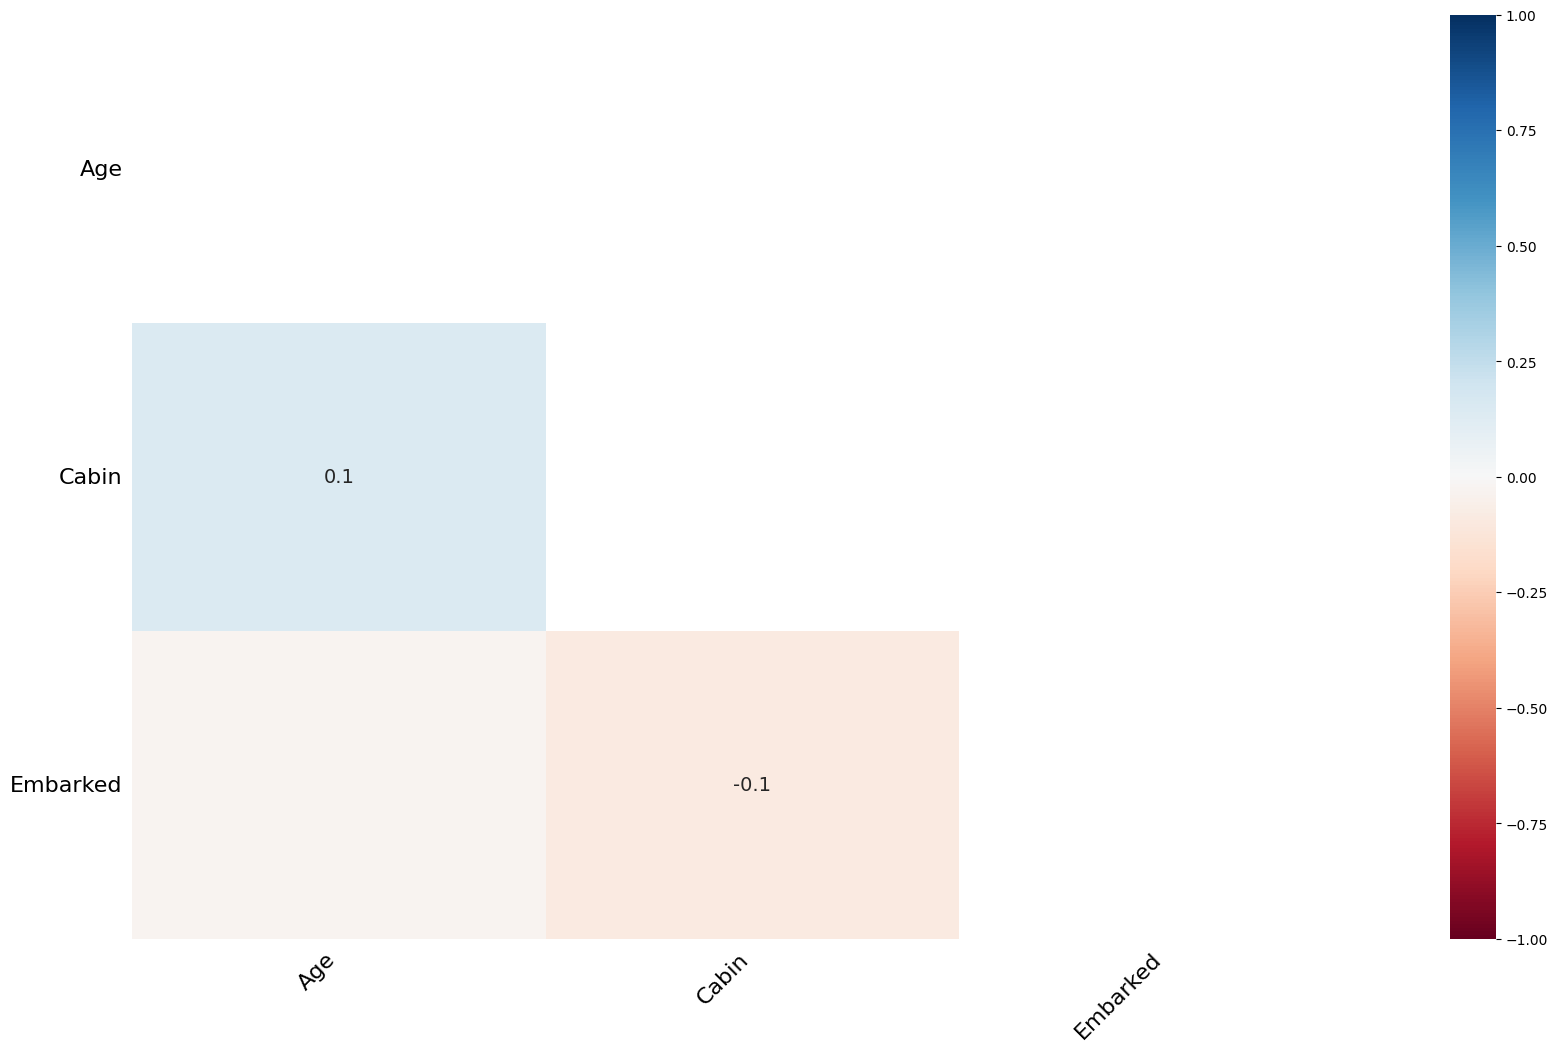

In [15]:
import missingno as mns
mns.heatmap(df)

In [16]:
corr = df.corr()

C:\Users\Shreyansh Singh\AppData\Local\Temp\ipykernel_10536\658818363.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


In [17]:
import seaborn as sns


<Axes: >

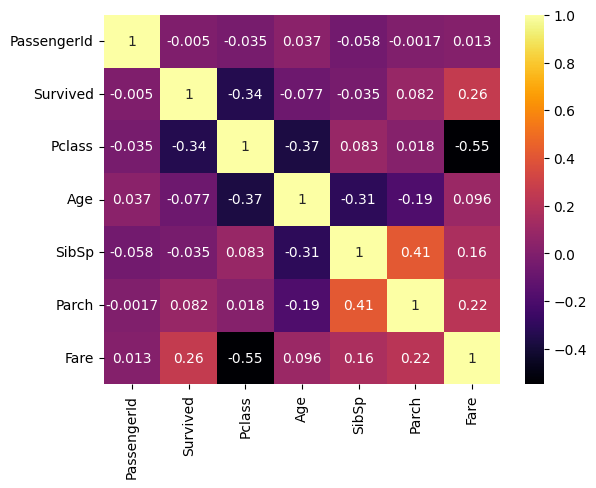

In [18]:
sns.heatmap(corr , annot = True , cmap='inferno')

In [19]:
import matplotlib.pyplot as plt

c:\Users\Shreyansh Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

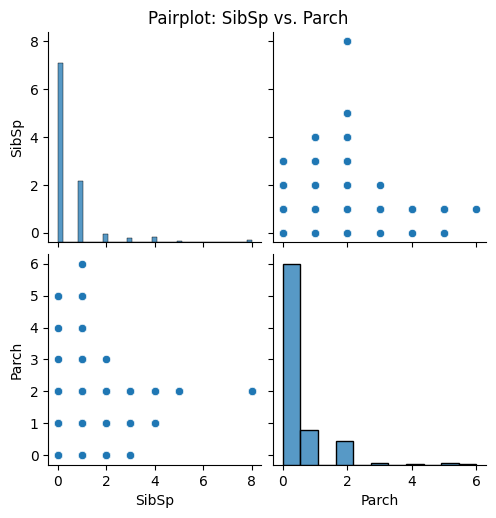

In [20]:
plt.figure(figsize=(10, 6))
sns.pairplot(df[['SibSp', 'Parch']], kind='scatter')
plt.suptitle('Pairplot: SibSp vs. Parch', y=1.02)
plt.show()

